In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():
 
    datasets = ['C:/Users/Rongon/MCA Minor Project 2020/Data Of Forests From Intel/archive/seg_train/seg_train', 'C:/Users/Rongon/MCA Minor Project 2020/Data Of Forests From Intel/archive/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
             # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  2%|█▌                                                                             | 45/2191 [00:00<00:05, 421.63it/s]

Loading C:/Users/Rongon/MCA Minor Project 2020/Data Of Forests From Intel/archive/seg_train/seg_train


  0%|                                                                                          | 0/437 [00:00<?, ?it/s]

Loading C:/Users/Rongon/MCA Minor Project 2020/Data Of Forests From Intel/archive/seg_test/seg_test


100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 535.96it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


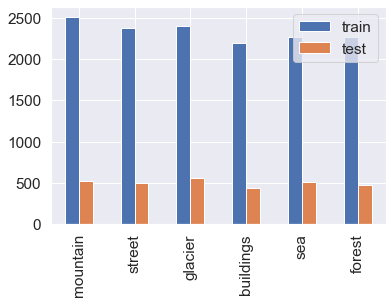

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

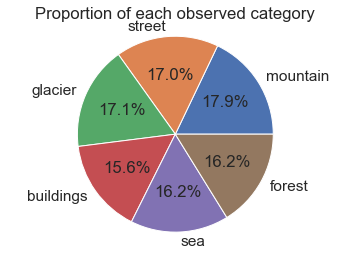

In [8]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

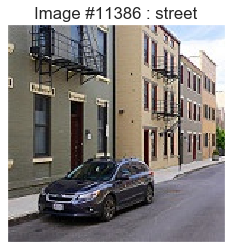

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

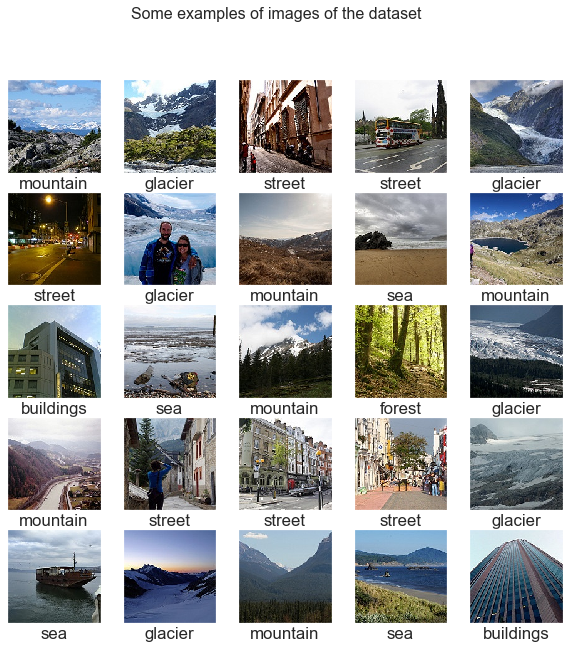

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
88/88 [==============================] - 151s 2s/step - loss: 1.3019 - accuracy: 0.5218 - val_loss: 0.8911 - val_accuracy: 0.6648
Epoch 2/5
88/88 [==============================] - 148s 2s/step - loss: 0.7486 - accuracy: 0.7231 - val_loss: 0.7028 - val_accuracy: 0.7503
Epoch 3/5
88/88 [==============================] - 152s 2s/step - loss: 0.5727 - accuracy: 0.7940 - val_loss: 0.7191 - val_accuracy: 0.7467
Epoch 4/5
88/88 [==============================] - 143s 2s/step - loss: 0.4329 - accuracy: 0.8494 - val_loss: 0.6233 - val_accuracy: 0.7838
Epoch 5/5
88/88 [==============================] - 143s 2s/step - loss: 0.2782 - accuracy: 0.9093 - val_loss: 0.7425 - val_accuracy: 0.7627


In [18]:
model.save('My_Model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: My_Model\assets


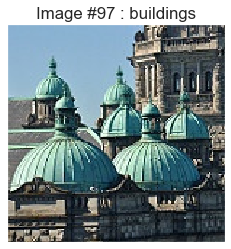

In [24]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [25]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

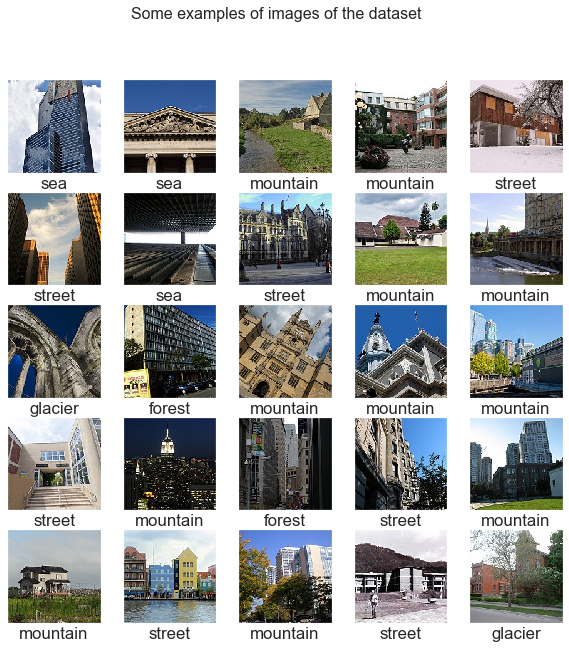

In [26]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

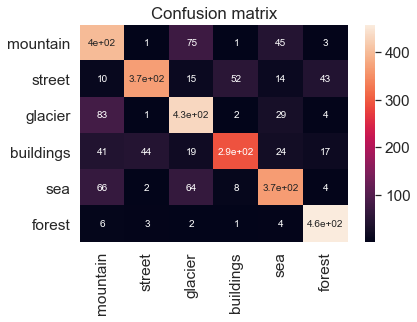

In [27]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [28]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input

model = VGG16(weights='imagenet', include_top=False)


In [29]:
print(model.input_shape)

(None, None, None, 3)


In [30]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [31]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [32]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

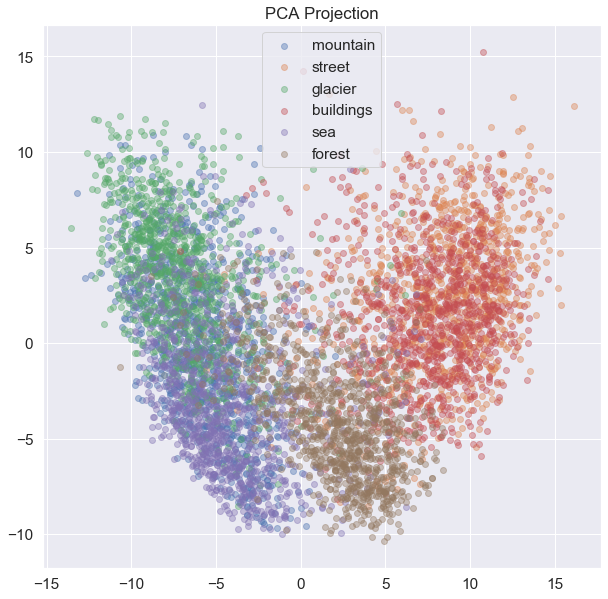

In [33]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [34]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
88/88 [==============================] - 2s 23ms/step - loss: 0.6173 - accuracy: 0.7732 - val_loss: 0.3838 - val_accuracy: 0.8546
Epoch 2/15
88/88 [==============================] - 1s 7ms/step - loss: 0.3263 - accuracy: 0.8826 - val_loss: 0.3377 - val_accuracy: 0.8710
Epoch 3/15
88/88 [==============================] - 1s 7ms/step - loss: 0.2673 - accuracy: 0.9075 - val_loss: 0.3284 - val_accuracy: 0.8760
Epoch 4/15
88/88 [==============================] - 1s 8ms/step - loss: 0.2262 - accuracy: 0.9224 - val_loss: 0.3105 - val_accuracy: 0.8824
Epoch 5/15
88/88 [==============================] - 1s 9ms/step - loss: 0.1907 - accuracy: 0.9358 - val_loss: 0.3226 - val_accuracy: 0.8814
Epoch 6/15
88/88 [==============================] - 1s 8ms/step - loss: 0.1597 - accuracy: 0.9474 - val_loss: 0.3201 - val_accuracy: 0.8871
Epoch 7/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1420 - accuracy: 0.9548 - val_loss: 0.3374 - val_accuracy: 0.8778
Epoch 8/15
88/88 [=

In [35]:
test_loss = model2.evaluate(test_features, test_labels)

94/94 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8653


In [36]:
model2.save('My_Model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: My_Model\assets


In [54]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [55]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [56]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
79/79 [==============================] - 1s 9ms/step - loss: 0.5312 - accuracy: 0.8039 - val_loss: 0.3714 - val_accuracy: 0.8700
Epoch 2/10
79/79 [==============================] - 1s 8ms/step - loss: 0.2619 - accuracy: 0.9086 - val_loss: 0.3367 - val_accuracy: 0.8629
Epoch 3/10
79/79 [==============================] - 1s 8ms/step - loss: 0.1905 - accuracy: 0.9388 - val_loss: 0.2083 - val_accuracy: 0.9252
Epoch 4/10
79/79 [==============================] - 1s 8ms/step - loss: 0.1434 - accuracy: 0.9565 - val_loss: 0.2087 - val_accuracy: 0.9225
Epoch 5/10
79/79 [==============================] - 1s 8ms/step - loss: 0.1184 - accuracy: 0.9648 - val_loss: 0.1778 - val_accuracy: 0.9421
Epoch 6/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0913 - accuracy: 0.9763 - val_loss: 0.1843 - val_accuracy: 0.9439
Epoch 7/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0678 - accuracy: 0.9844 - val_loss: 0.1801 - val_accuracy: 0.9492
Epoch 8/10
79/79 [==

In [57]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8876666666666667


In [60]:
print(model2.input_shape)

(None, 4, 4, 512)


In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

model = VGG16(weights='imagenet', include_top=False)
input_tensor=Input(shape=(150, 150, 3))
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [67]:
from tensorflow.keras.layers import Input
input_shape = model2.layers[-4].get_input_shape_at(0)
input_shape=Input(shape=(150,150,3))
input_shape

<tf.Tensor 'input_14:0' shape=(None, 150, 150, 3) dtype=float32>

In [77]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False,input_tensor=Input(shape=(150,150,3)))

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
input_shape=Input(shape=(150,150,3))
layer_input = Input(shape = (150, 150,3)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

ValueError: Input 0 of layer block5_conv1 is incompatible with the layer: expected axis -1 of input shape to have value 512 but received input with shape [None, 150, 150, 3]

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [46]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 788544)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               78854500  
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 606       
Total params: 78,856,898
Trainable params: 78,856,898
Non-trainable params: 0
__________________________________________

In [48]:
new_model.save('My_Model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: My_Model\assets


In [41]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = (150,150,3) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 3)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [42]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
new_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)         

In [44]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
88/88 [==============================] - 250s 3s/step - loss: 0.6572 - accuracy: 0.7406 - val_loss: 0.3378 - val_accuracy: 0.8849
Epoch 2/10
88/88 [==============================] - 259s 3s/step - loss: 0.3185 - accuracy: 0.8923 - val_loss: 0.2980 - val_accuracy: 0.8935
Epoch 3/10
88/88 [==============================] - 261s 3s/step - loss: 0.2540 - accuracy: 0.9113 - val_loss: 0.2707 - val_accuracy: 0.9045
Epoch 4/10
88/88 [==============================] - 261s 3s/step - loss: 0.1943 - accuracy: 0.9303 - val_loss: 0.2832 - val_accuracy: 0.9027
Epoch 5/10
88/88 [==============================] - 262s 3s/step - loss: 0.1714 - accuracy: 0.9407 - val_loss: 0.3214 - val_accuracy: 0.8903
Epoch 6/10
88/88 [==============================] - 268s 3s/step - loss: 0.1510 - accuracy: 0.9466 - val_loss: 0.3535 - val_accuracy: 0.8978
Epoch 7/10
88/88 [==============================] - 266s 3s/step - loss: 0.1171 - accuracy: 0.9605 - val_loss: 0.3210 - val_accuracy: 0.9102
Epoch 8/10
88

In [45]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.893


In [46]:
new_model.save('My_Model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: My_Model\assets


In [47]:
print(model.input.shape)

(None, None, None, 3)


In [48]:
feature_columns = [tf.feature_column.numeric_column("x", shape=(3,))]

In [50]:
print(new_model.input.shape)

(None, 9, 9, 512)
